In [ ]:
!pip install pandas

In [ ]:
#import numpy as np
#Para el proceso de lectura y tratamiento de datos
import pandas as pd
import unicodedata #limpieza de texto
import re # manejo y tratado de texto

In [ ]:
# Empezamos cargando los datos
data = "https://raw.githubusercontent.com/patofw/imf_master/master/proyecto_final_datos/Tweets.txt"
# Pandas nos permite hacerlo directamente de una Url
tw = pd.read_json(data,lines=True)
tw.head()

<ipython-input-3-65e0d10e38d4>:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  tw = pd.read_json(data,lines=True)
<ipython-input-3-65e0d10e38d4>:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  tw = pd.read_json(data,lines=True)


,delete,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,retweeted_status,extended_entities
0,"{'status': {'id': 294512601600258048, 'id_str'...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,NaN,2014-09-10 17:01:33+00:00,5.097485e+17,5.097485e+17,@Brenamae_ I WHALE SLAP YOUR FIN AND TELL YOU ...,"<a href=""http://twitter.com/download/android"" ...",0.0,5.097481e+17,5.097481e+17,242563886.0,...,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,en,2014-09-10 17:02:16.576,NaN,NaN
2,"{'status': {'id': 204951917716189185, 'id_str'...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,"{'status': {'id': 509733211497193473, 'id_str'...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,"{'status': {'id': 509745353999278080, 'id_str'...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
print(f"Rows: {len(tw.axes[0])} , Cols : {len(tw.axes[1])}")

Rows: 501 , Cols : 28


In [ ]:
#Número de filas que tienen el valor de NaN
tw.count()

delete                        79
created_at                   422
id                           422
id_str                       422
text                         422
source                       422
truncated                    422
in_reply_to_status_id         56
in_reply_to_status_id_str     56
in_reply_to_user_id           63
in_reply_to_user_id_str       63
in_reply_to_screen_name       63
user                         422
geo                            9
coordinates                    9
place                         10
contributors                   0
retweet_count                422
favorite_count               422
entities                     422
favorited                    422
retweeted                    422
possibly_sensitive           422
filter_level                 422
lang                         422
timestamp_ms                 422
retweeted_status             162
extended_entities             62
dtype: int64

In [ ]:
print(f"Total [delete] : {tw['delete'].count()} , Total [text] : {tw['text'].count()}")

Total [delete] : 79 , Total [text] : 422


In [ ]:
# Depuración de los Datos
twCl = tw[tw['text'].notna()]
#df[df.text == 'NaN']
# df.dropna() # check
print(f"Total delete : {twCl['delete'].count()} , Total text : {twCl['text'].count()}")

Total delete : 0 , Total text : 422


In [ ]:
twCl.head(10)

,delete,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,retweeted_status,extended_entities
1,NaN,2014-09-10 17:01:33+00:00,5.097485e+17,5.097485e+17,@Brenamae_ I WHALE SLAP YOUR FIN AND TELL YOU ...,"<a href=""http://twitter.com/download/android"" ...",0.0,5.097481e+17,5.097481e+17,242563886.0,...,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,en,2014-09-10 17:02:16.576,NaN,NaN
14,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,Metin Şentürk Twitterda @metinsenturk MUHTEŞEM...,"<a href=""http://www.twitter.com"" rel=""nofollow...",0.0,NaN,NaN,NaN,...,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,tr,2014-09-10 17:02:16.576,NaN,NaN
15,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,RT @byunghns: 😭 I LOVE #틴탑 SO MUCH #쉽지않아 IS GO...,"<a href=""https://twitter.com/download/android""...",0.0,NaN,NaN,NaN,...,0.0,"{'hashtags': [{'text': '틴탑', 'indices': [23, 2...",0.0,0.0,0.0,medium,en,2014-09-10 17:02:16.576,{'created_at': 'Wed Sep 10 15:16:53 +0000 2014...,NaN
16,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,que hdp maicon lo que le hizo a david luiz jaj...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,NaN,NaN,NaN,...,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,es,2014-09-10 17:02:16.576,NaN,NaN
17,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,ドライ！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,NaN,NaN,NaN,...,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,ja,2014-09-10 17:02:16.576,NaN,NaN
18,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,RT @Positivamos: tudo o que eu quero é um amor...,"<a href=""https://about.twitter.com/products/tw...",0.0,NaN,NaN,NaN,...,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,pt,2014-09-10 17:02:16.576,{'created_at': 'Wed Sep 10 16:53:38 +0000 2014...,NaN
19,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,RT @GossipRoomOff: Si Nathalie sait pertinemme...,"<a href=""http://www.bbotmaker.com/"" rel=""nofol...",0.0,NaN,NaN,NaN,...,0.0,"{'hashtags': [{'text': 'SS8', 'indices': [139,...",0.0,0.0,0.0,medium,fr,2014-09-10 17:02:16.576,{'created_at': 'Wed Sep 10 17:00:21 +0000 2014...,NaN
20,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,RT @Dayannalozano_: Junior va perdiendo... htt...,"<a href=""http://twitter.com/download/android"" ...",0.0,NaN,NaN,NaN,...,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,es,2014-09-10 17:02:16.576,{'created_at': 'Mon Sep 08 00:31:26 +0000 2014...,"{'media': [{'id': 508774571215159296, 'id_str'..."
21,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,RT @Positivamos: tudo o que eu quero é um amor...,"<a href=""https://about.twitter.com/products/tw...",0.0,NaN,NaN,NaN,...,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,pt,2014-09-10 17:02:16.576,{'created_at': 'Wed Sep 10 16:53:38 +0000 2014...,NaN
22,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,RT @Positivamos: tudo o que eu quero é um amor...,"<a href=""https://about.twitter.com/products/tw...",0.0,NaN,NaN,NaN,...,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,pt,2014-09-10 17:02:16.576,{'created_at': 'Wed Sep 10 16:53:38 +0000 2014...,NaN


In [ ]:
langs = twCl.groupby('lang')[['text']].count().reset_index()
langs.sort_values(by="text", ascending=False)

,lang,text
3,en,128
10,ja,66
4,es,49
15,pt,33
0,ar,32
22,tr,27
23,und,25
6,fr,17
20,th,7
8,in,7


In [ ]:
langs['text'].sum()

422

In [ ]:
twEs = twCl[twCl.loc[:,'lang'] == 'es']
twEs = twEs.filter(['text'], axis=1)

In [ ]:
twEs.head(20)

,text
16,que hdp maicon lo que le hizo a david luiz jaj...
20,RT @Dayannalozano_: Junior va perdiendo... htt...
38,#AbrahamMateoEnCanalFiesta @dominguezja Necesi...
93,Amaia necesito un certificado para mañana pres...
129,Es imposible aguntar en mi casa.
138,Me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...
156,@la12tuittera @americancloss alguien podría ex...
166,@mariam_63 entra aca y le ragalas UNOs 15 min...
168,@Belu_Cervantes jajaja.. felicidaaaaadeees ton...
170,"En el bus demos prioridad a niños,mujeres emba..."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cargar los sentimientos en español
sentimientos = '/content/drive/MyDrive/sentimientos-esp.xlsx'
sent = pd.read_excel(sentimientos, names=['word', 'sent'])

In [ ]:
sent.head(20)

,word,sent
0,abandonado,-2
1,abandona,-2
2,secuestrado,-2
3,abducción,-2
4,abducciones,-2
5,aborrecer,-3
6,aborrecido,-3
7,aborrecible,-3
8,aborrece,-3
9,habilidades,2


In [ ]:
import unicodedata #limpieza de texto
import re

print(twEs['text'][16])
print(unicodedata.normalize('NFKD', twEs['text'][16]).encode('ascii', 'ignore').decode('utf-8').strip())

que hdp maicon lo que le hizo a david luiz jajajajajajajajajajaj,igual se jodio la carrera
que hdp maicon lo que le hizo a david luiz jajajajajajajajajajaj,igual se jodio la carrera


In [ ]:
#Limpieza del texto de Tw Eng
# Metodo para limpiar los tweets
def lmpTxt(text):
  # Elimina caracteres especiales
  txt = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
  # Converit texto a minúsculas
  txt = txt.lower()
  # limpieza de urls
  txt =  re.sub('(https?|ftp|file):\/\/\S+', " ", txt)
  # Limpieza de usernames
  txt =  re.sub('(@[^\s]+\s)', " ", txt)
  # Limpieza de hashtags
  txt =  re.sub('(#[^\s]+\s)', " ", txt)
  # Limpieza de palabra rt, de los retweets
  txt =  re.sub('^rt', "", txt)
  # limpiar otros caracteres especiales
  txt =  re.sub('\W+', " ", txt)
  #limpiza de caracateres blancos, inicio y final
  txt = txt.strip()
  return txt


In [ ]:
twEs['txtDep'] = twEs['text'].apply(lambda x: lmpTxt(x))
twEs['txtNumber'] = twEs['txtDep'].apply(lambda x: len(x.split()))

In [ ]:
twEs.head(15)

,text,txtDep,txtNumber
16,que hdp maicon lo que le hizo a david luiz jaj...,que hdp maicon lo que le hizo a david luiz jaj...,16
20,RT @Dayannalozano_: Junior va perdiendo... htt...,junior va perdiendo,3
38,#AbrahamMateoEnCanalFiesta @dominguezja Necesi...,necesito que me susure al oido abrazarlo senti...,17
93,Amaia necesito un certificado para mañana pres...,amaia necesito un certificado para manana pres...,13
129,Es imposible aguntar en mi casa.,es imposible aguntar en mi casa,6
138,Me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,6
156,@la12tuittera @americancloss alguien podría ex...,alguien podria explicar el por que,6
166,@mariam_63 entra aca y le ragalas UNOs 15 min...,entra aca y le ragalas unos 15 minutos de voto...,15
168,@Belu_Cervantes jajaja.. felicidaaaaadeees ton...,jajaja felicidaaaaadeees tontula me acabo de e...,9
170,"En el bus demos prioridad a niños,mujeres emba...",en el bus demos prioridad a ninos mujeres emba...,22


In [ ]:
wrds = twEs['txtDep'][174].split()
print('Número de Palabras:',len(wrds))
print(wrds)

Número de Palabras: 19
['no', 'trato', 'de', 'ser', 'mejor', 'que', 'nadie', 'trato', 'de', 'ser', 'lo', 'mejor', 'que', 'te', 'ha', 'sucedido', 'en', 'la', 'vida']


In [ ]:
if len(wrds) > 0:
  wrd = wrds[4]
  print(wrd)

mejor


In [ ]:
val = sent.loc[sent['word']==wrd]

In [ ]:
print(val)

      word  sent
258  mejor     3
264  mejor     2


In [ ]:
#ir agregando al arreglo append
def asignarSent(text):
  words = text.split()
  wordsSentTxt = []
  if len(words) > 0:
    for w in words:
      val = sent.loc[sent['word']==w]
      if not val.empty:
        wordsSentTxt.append(val['sent'].iloc[0])
  return wordsSentTxt

In [ ]:
# Encontrar las palabras con sentimiento y crear nueva columna
twEs['sentPalabras'] = twEs['txtDep'].apply(lambda x: asignarSent(x))
twEs.head(15)

,text,txtDep,txtNumber,sentPalabras
16,que hdp maicon lo que le hizo a david luiz jaj...,que hdp maicon lo que le hizo a david luiz jaj...,16,[]
20,RT @Dayannalozano_: Junior va perdiendo... htt...,junior va perdiendo,3,[]
38,#AbrahamMateoEnCanalFiesta @dominguezja Necesi...,necesito que me susure al oido abrazarlo senti...,17,[]
93,Amaia necesito un certificado para mañana pres...,amaia necesito un certificado para manana pres...,13,[]
129,Es imposible aguntar en mi casa.,es imposible aguntar en mi casa,6,[]
138,Me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,6,[]
156,@la12tuittera @americancloss alguien podría ex...,alguien podria explicar el por que,6,[]
166,@mariam_63 entra aca y le ragalas UNOs 15 min...,entra aca y le ragalas unos 15 minutos de voto...,15,[]
168,@Belu_Cervantes jajaja.. felicidaaaaadeees ton...,jajaja felicidaaaaadeees tontula me acabo de e...,9,[]
170,"En el bus demos prioridad a niños,mujeres emba...",en el bus demos prioridad a ninos mujeres emba...,22,[]


In [ ]:
tmp = twEs['sentPalabras'][174]
print(tmp)
print(f"Suma:  {sum(tmp) if len(tmp) > 0 else 'und'}")

[3, 3]
Suma:  6


In [ ]:
# calcular el sentimiento del tweet a partir de la suma del sentimiento de las palabras con sentimeinto en el tweet
twEs['sentText'] = twEs['sentPalabras'].apply(lambda x: sum(x) if len(x) > 0 else 'und')
twEs.head(30)

,text,txtDep,txtNumber,sentPalabras,sentText
16,que hdp maicon lo que le hizo a david luiz jaj...,que hdp maicon lo que le hizo a david luiz jaj...,16,[],und
20,RT @Dayannalozano_: Junior va perdiendo... htt...,junior va perdiendo,3,[],und
38,#AbrahamMateoEnCanalFiesta @dominguezja Necesi...,necesito que me susure al oido abrazarlo senti...,17,[],und
93,Amaia necesito un certificado para mañana pres...,amaia necesito un certificado para manana pres...,13,[],und
129,Es imposible aguntar en mi casa.,es imposible aguntar en mi casa,6,[],und
138,Me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,6,[],und
156,@la12tuittera @americancloss alguien podría ex...,alguien podria explicar el por que,6,[],und
166,@mariam_63 entra aca y le ragalas UNOs 15 min...,entra aca y le ragalas unos 15 minutos de voto...,15,[],und
168,@Belu_Cervantes jajaja.. felicidaaaaadeees ton...,jajaja felicidaaaaadeees tontula me acabo de e...,9,[],und
170,"En el bus demos prioridad a niños,mujeres emba...",en el bus demos prioridad a ninos mujeres emba...,22,[],und


In [ ]:
# Imprimir muestra con sentimiento
print(twEs[twEs.loc[:, 'sentText'] != 'und'].count())
twEs[twEs.loc[:, 'sentText'] != 'und']

text            10
txtDep          10
txtNumber       10
sentPalabras    10
sentText        10
dtype: int64


,text,txtDep,txtNumber,sentPalabras,sentText
172,RT @MaxiiPoli: Iara es la mejor y me re ama,iara es la mejor y me re ama,8,[3],3
174,"No trato de ser mejor que nadie, trato de ser ...",no trato de ser mejor que nadie trato de ser l...,19,"[3, 3]",6
176,RT @EsppeonzAguirre: Ojo con las bananas...¡Ar...,ojo con las bananas aranas yo prefiero los pla...,14,[3],3
178,RT @ZodiacoHoy: #Sagitario Hoy recuerda que es...,hoy recuerda que es bueno sonar pero es mucho ...,22,[3],3
214,RT @jmfmoran: Qué buena idea llamar al FBI. To...,que buena idea llamar al fbi total eeuu no abu...,22,[1],1
232,RT @TomiMondolo8: Solo entiende mi locura quie...,solo entiende mi locura quien comparte mi pasi...,9,[-2],-2
285,Ariana grande😍 http://t.co/NzJPhxK16G,ariana grande,2,[1],1
307,"No olvide nada, solo deje de lado lo que ya no...",no olvide nada solo deje de lado lo que ya no ...,13,[-2],-2
361,Es gracioso cuando aquello que ayer te dolía e...,es gracioso cuando aquello que ayer te dolia e...,19,[-2],-2
412,RT @sergioaruizh: Lo malo de las mentes cerrad...,lo malo de las mentes cerradas es que vienen c...,12,[-3],-3


<Axes: xlabel='sentText'>

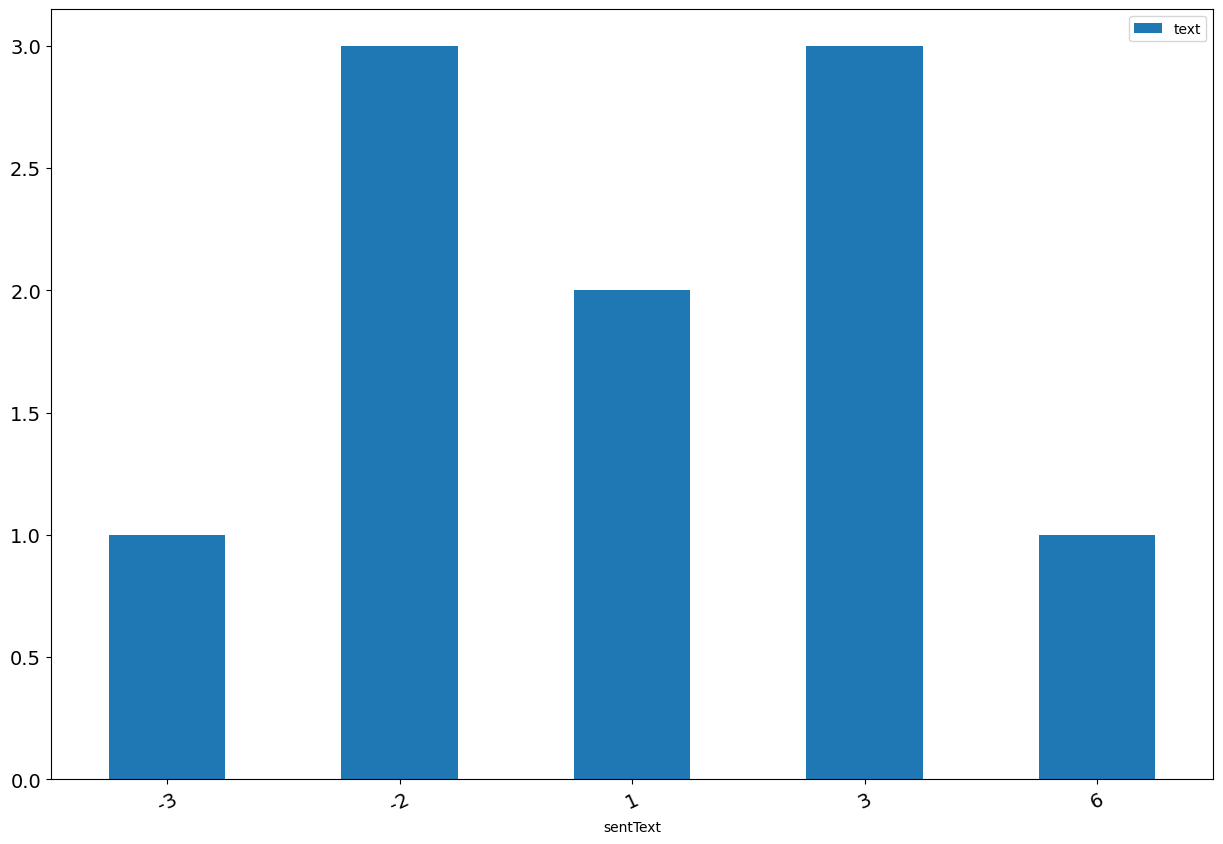

In [ ]:
twEs[twEs.loc[:, 'sentText'] != 'und'].groupby('sentText')[['text']].count().reset_index().plot.bar(x='sentText', y='text', rot=25, fontsize=14, figsize=(15, 10))#.plot(kind="barh", fontsize=14, figsize=(15, 10))